## Final Project, Part 3: Exploratory Data Analysis

## [Map of San Francisco Bike Shares](http://104.236.187.234/bike-share-map.html)

The majority of this project was used on gathering my data and loading it into a database. I was only able to explore a little bit with modeling the data.  However, the more I tried to model it, the more I had to change the structure of the data.

This entailed parsing csv files of the San Fransico Bike Share from 9-2015 to 9-2016 and creating a sql file.
* [Create Stations](https://github.com/nullpointer0x00/ds-sfb/blob/master/station-sql-create.py)
* [Create Station Status](https://github.com/nullpointer0x00/ds-sfb/blob/master/station-status-create.py)
* [Create Trip Data](https://github.com/nullpointer0x00/ds-sfb/blob/master/trip-data-create.py)

The weather data was gathered from wunderground api.
* [Wunderground Consumer](https://github.com/nullpointer0x00/ds-sfb/blob/master/wunderground.py)
* [Cached Responses](https://github.com/nullpointer0x00/ds-sfb/tree/master/wunder_cache)

I started a class to query the database and load it into a pandas dataframe.  This I will be updating as I need make new queries.
* [DB-to-Dataframe helper](https://github.com/nullpointer0x00/ds-sfb/blob/master/station_dataframes.py)

I added a few data rollup queries as well (WIP):
* [Scripts](https://github.com/nullpointer0x00/ds-sfb/tree/master/sql)

In [12]:
import sys
sys.path.append("../")
from IPython.core.display import display, HTML
from station_dataframes import StationDataframes
from map_stations import MapStations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

station_df = StationDataframes()
df = station_df.get_station_activity_weather('65, 66, 74, 73, 71')


AttributeError: 'DataFrame' object has no attribute 'col'

In [15]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
station_66 = df[(df['station_id'] == 66)]
# print station_66['bikes_available'].autocorr(lag=1)
ax = sns.boxplot(x="station_id", y="bikes_available", data=station_66)

TypeError: 'Index' object is not callable

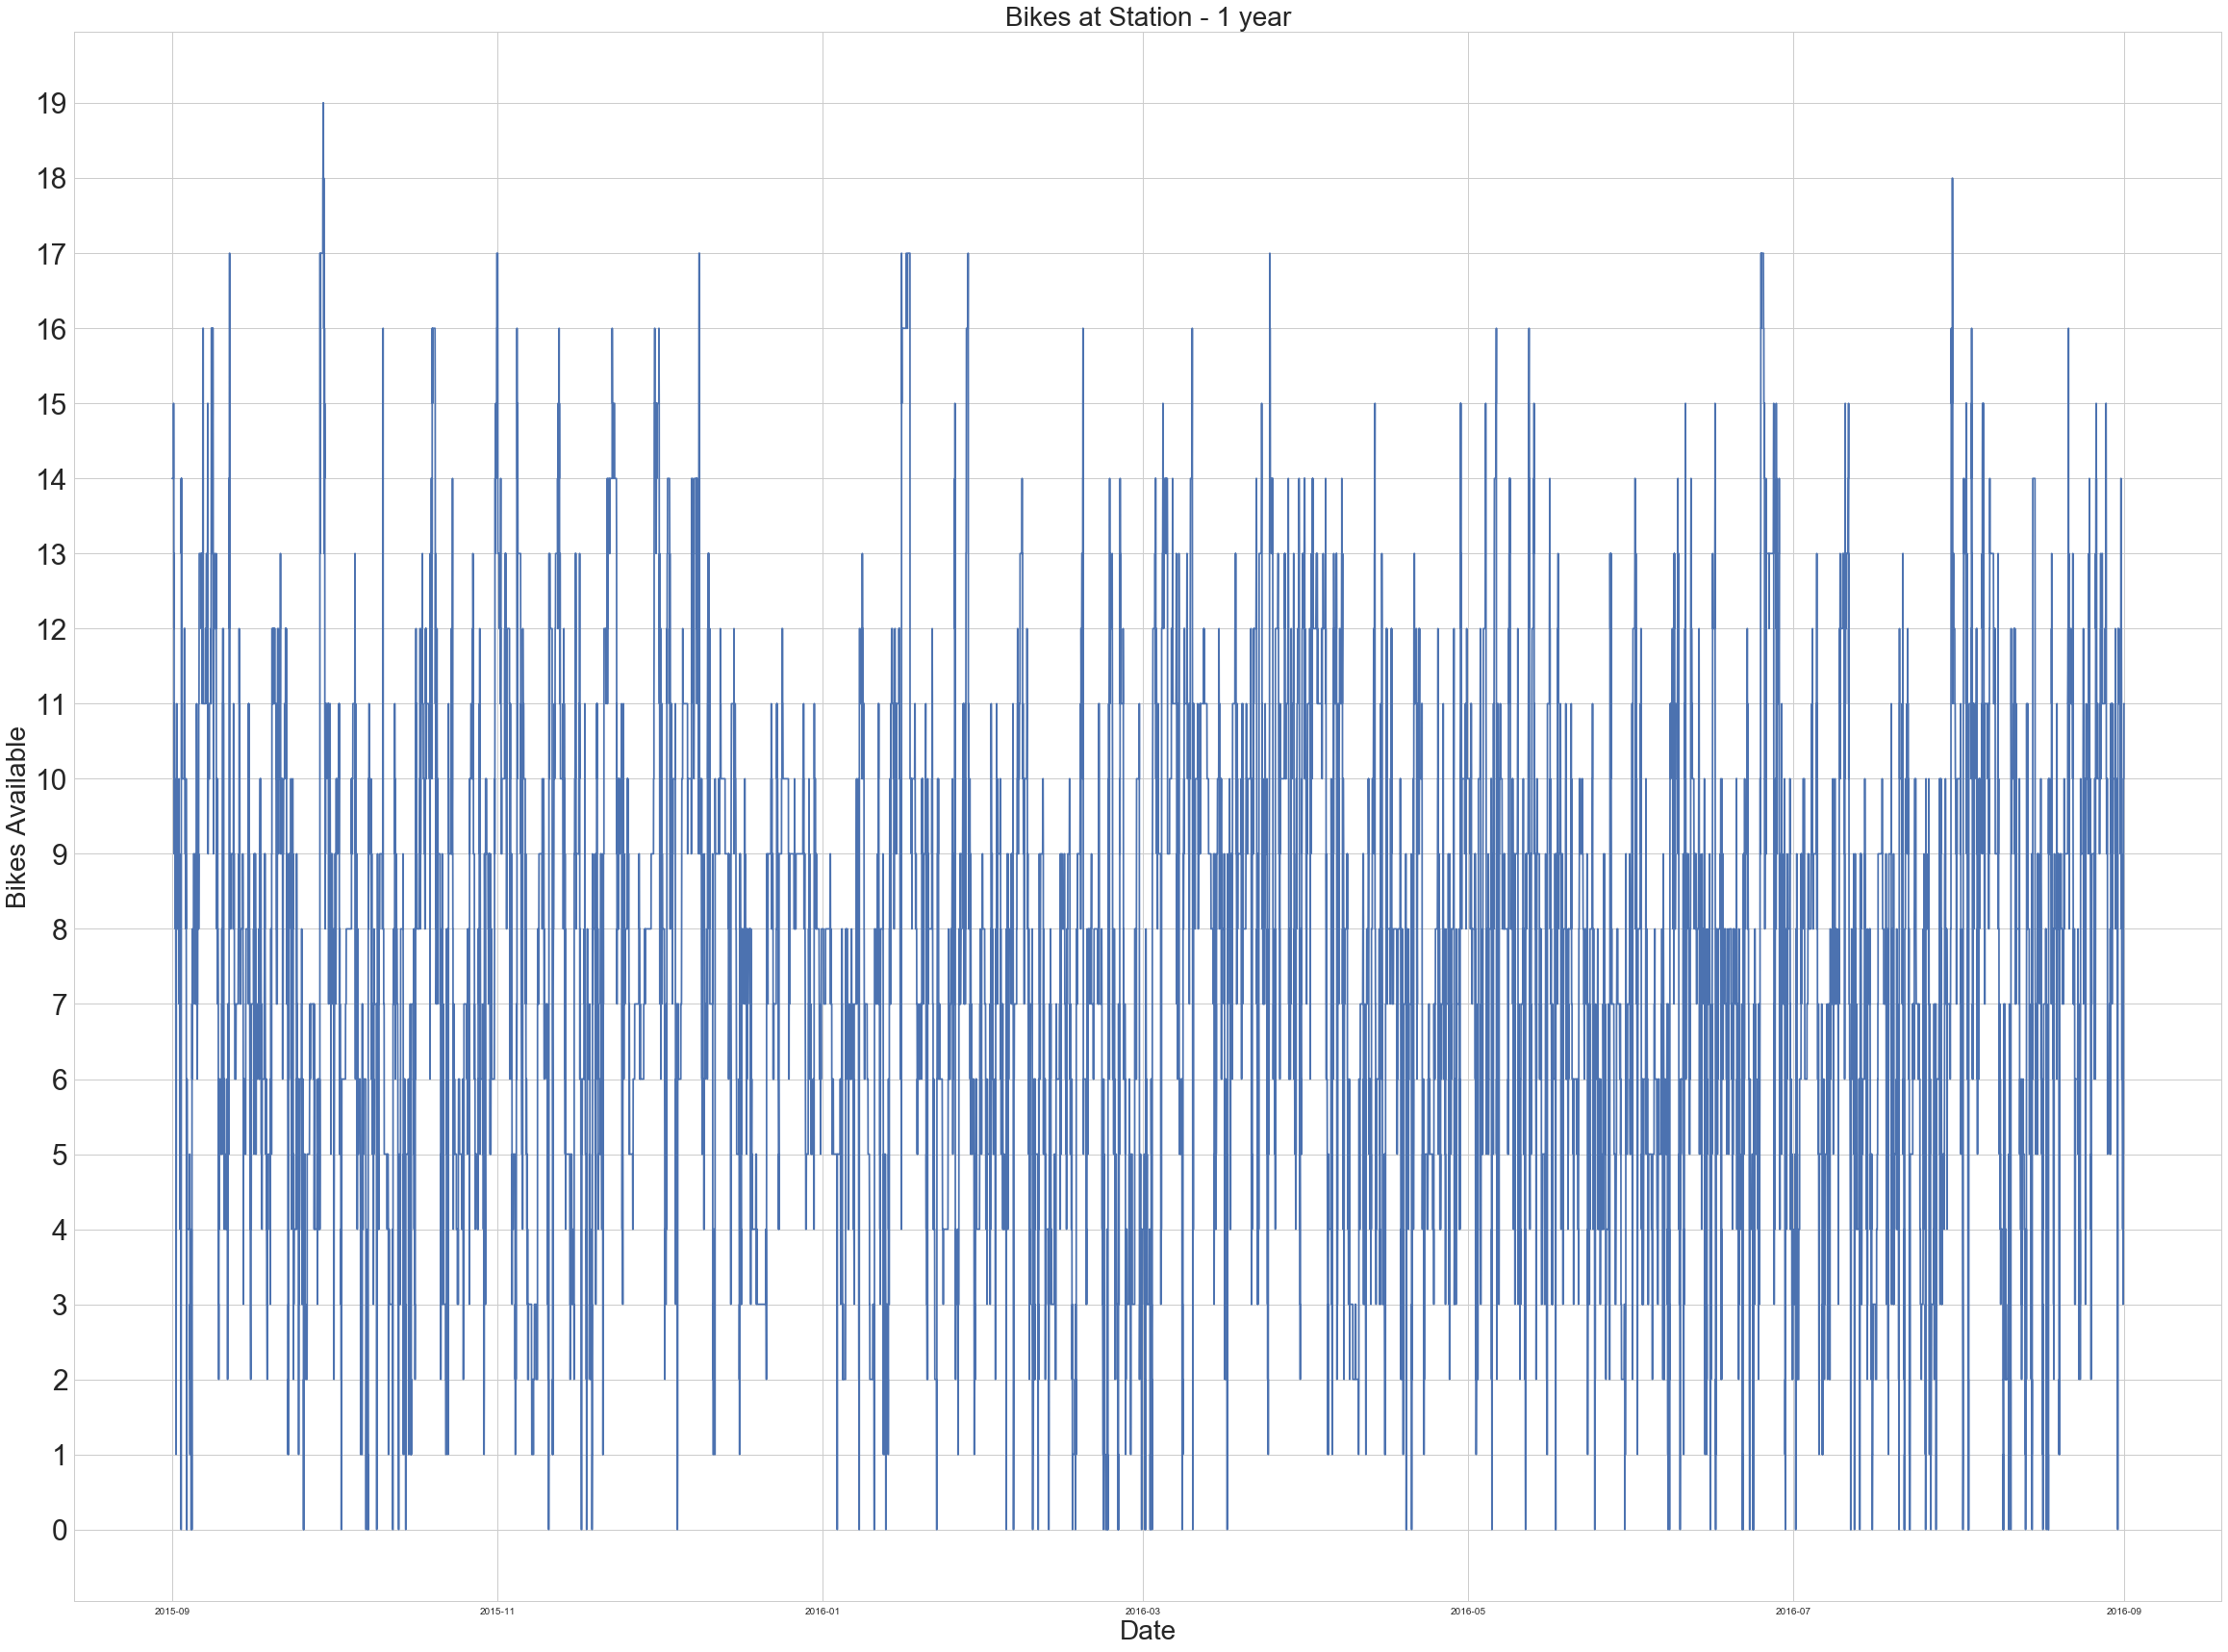

In [5]:
plt.figure(figsize=(40,30))

data = df[df["station_id"] == 66]
station_name = data["landmark"]
x = data["time"]
y = data["bikes_available"]
plt.plot(x, y)
plt.ylabel("Bikes Available", fontsize=28)
plt.xlabel("Date", fontsize=28)
plt.title("Bikes at Station - 1 year", fontsize=28)
plt.yticks(np.arange(0, 20, 1) , fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

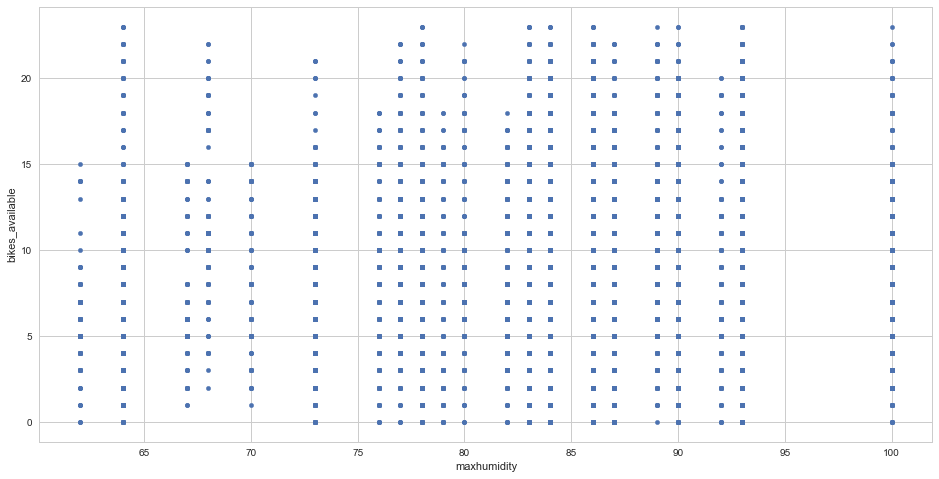

In [17]:
mask = (df['time'] > '2015-9-7') & (df['time'] <= '2015-12-8')
data = df.loc[mask]
# fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='maxhumidity', y='bikes_available', figsize=(16, 8))

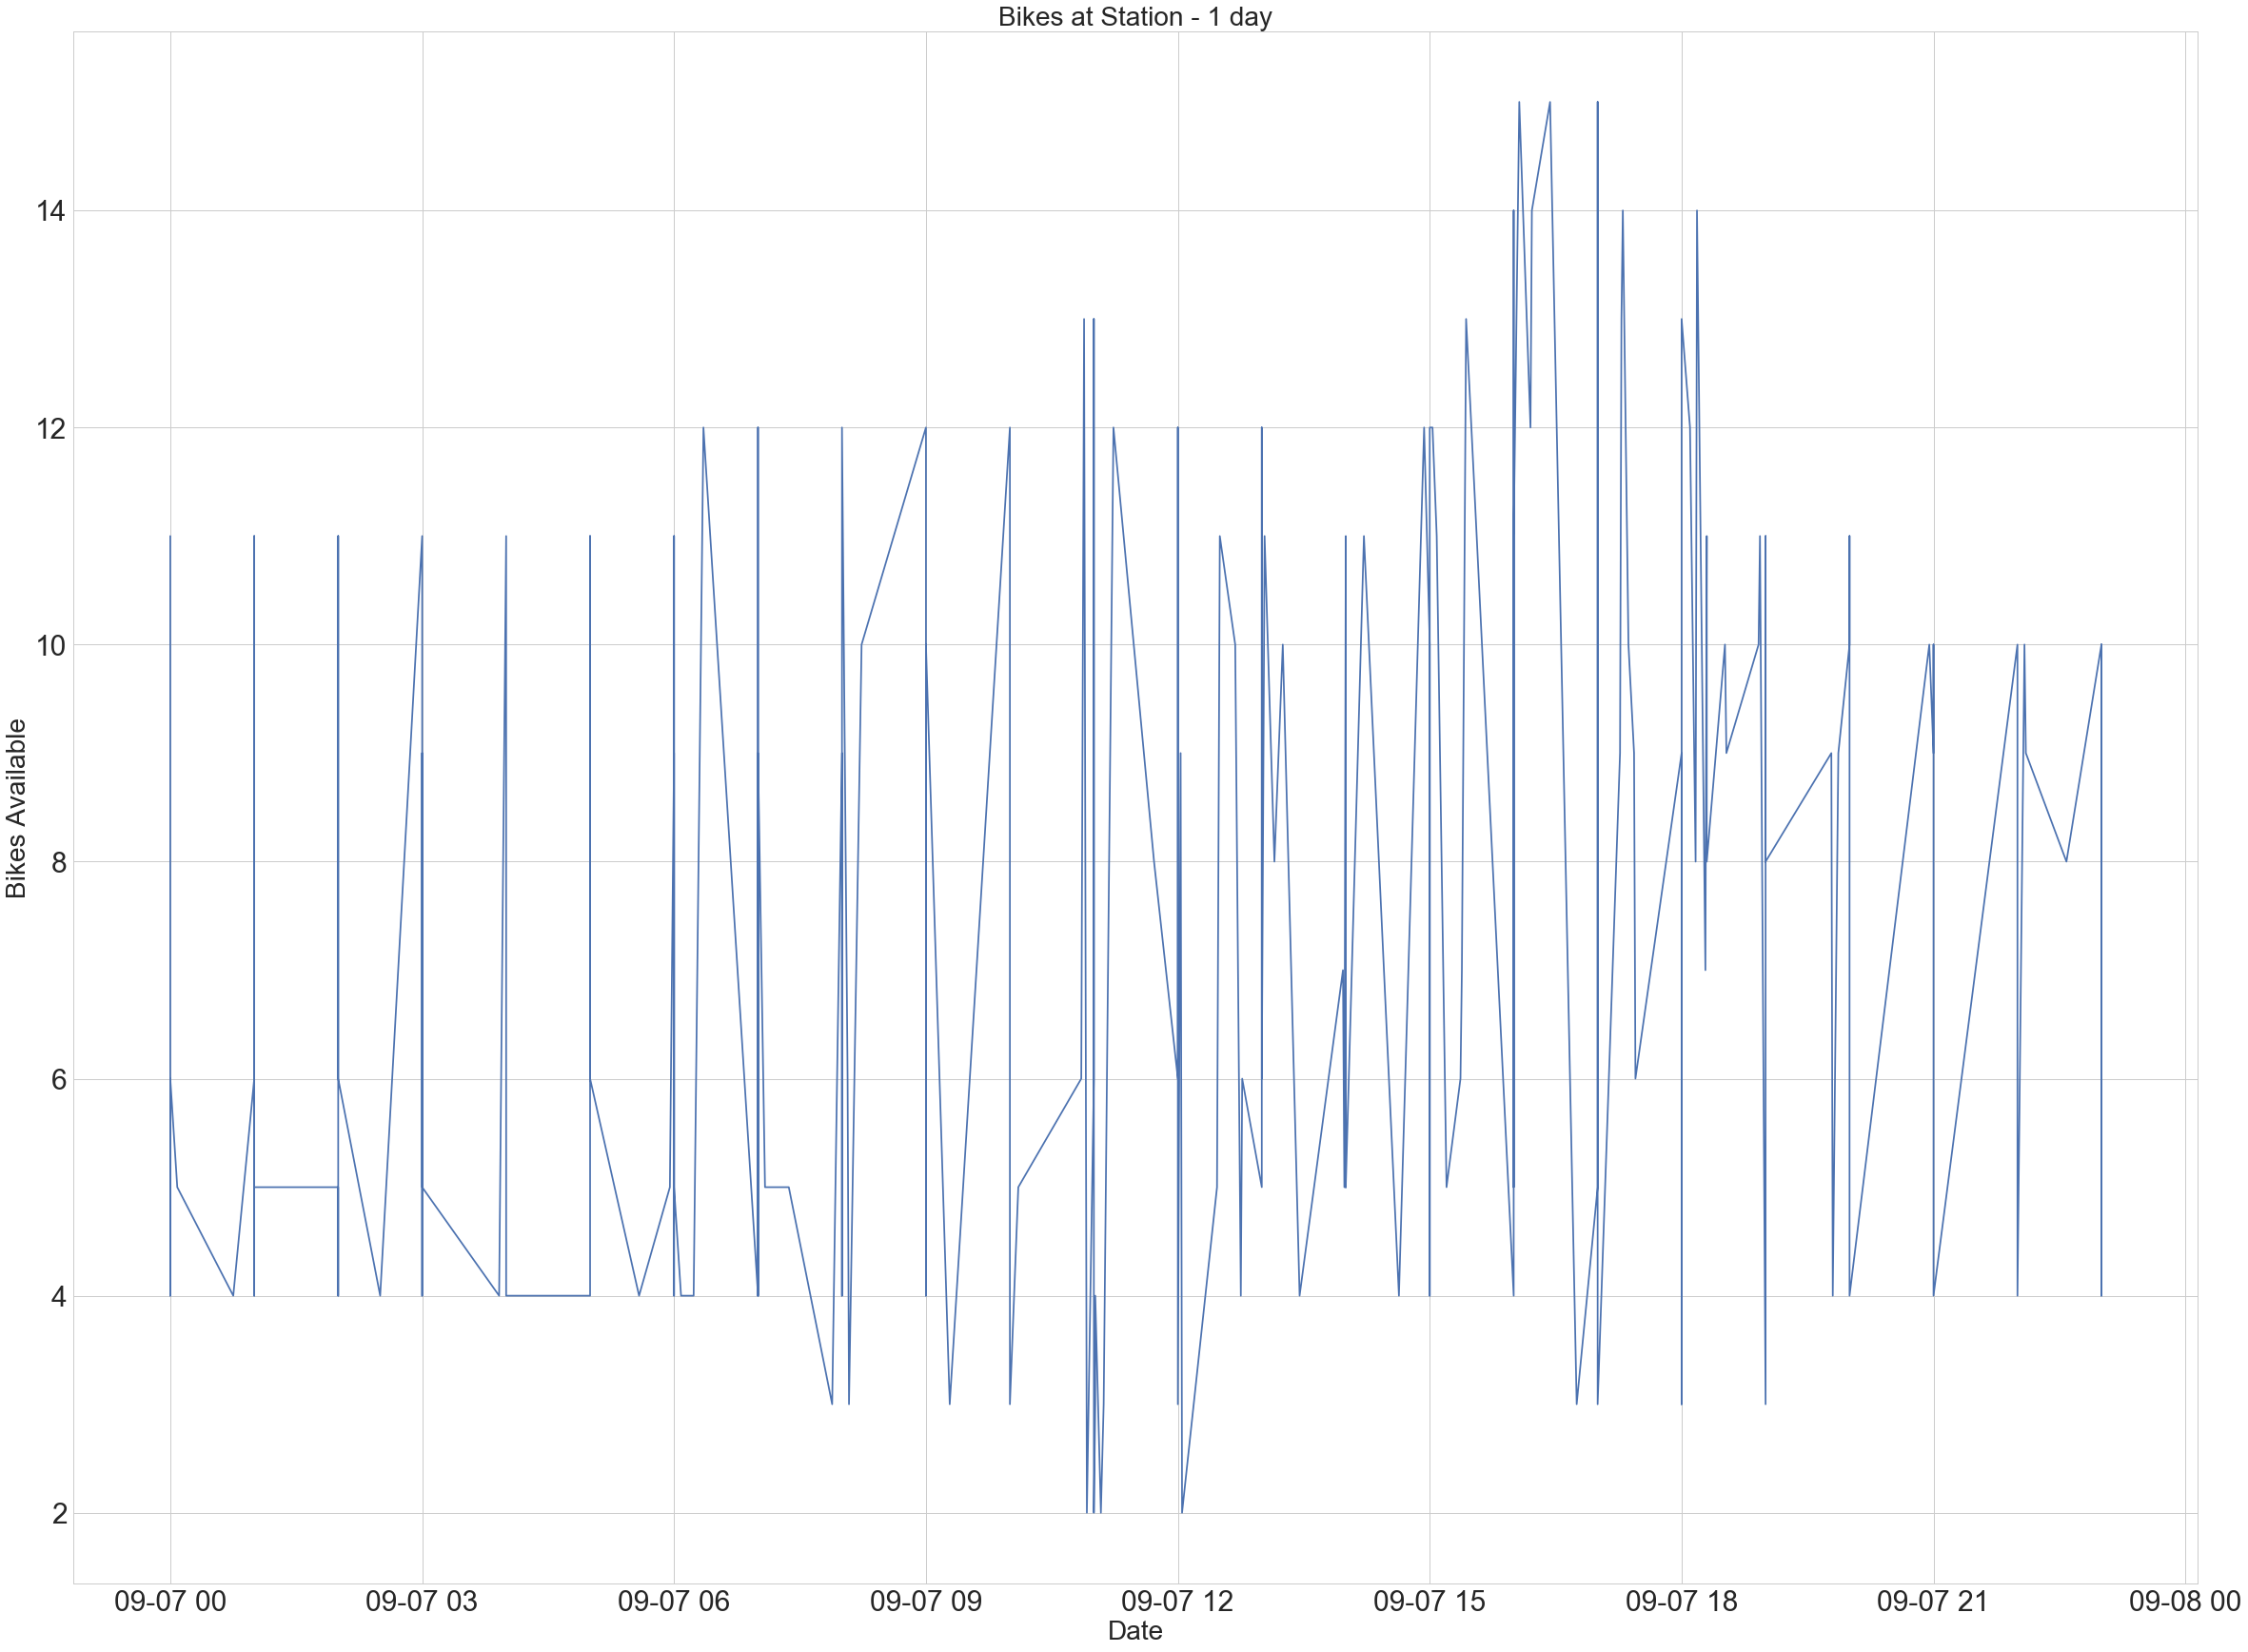

In [54]:
plt.figure(figsize=(40,30))

data = df[df["station_id"] == 66]
station_name = data["landmark"]
mask = (df['time'] > '2015-9-7') & (df['time'] <= '2015-9-8')
data = df.loc[mask]
x = data["time"]
y = data["bikes_available"]
plt.plot(x, y)
plt.ylabel("Bikes Available", fontsize=28)
plt.yticks(fontsize = 30)
plt.xlabel("Date", fontsize=28)
plt.xticks(fontsize = 30)
plt.title("Bikes at Station - 1 day", fontsize=28)
plt.show()

In [55]:
df.set_index('time', inplace=True)

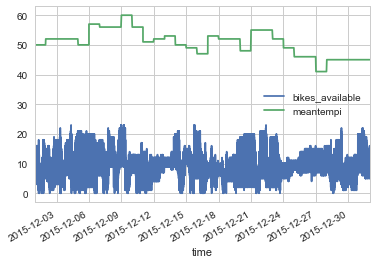

In [57]:
df[['bikes_available', 'meantempi']]['2015-12'].plot()

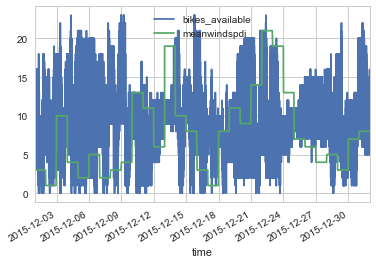

In [59]:
df[['bikes_available', 'meanwindspdi']]['2015-12'].plot()

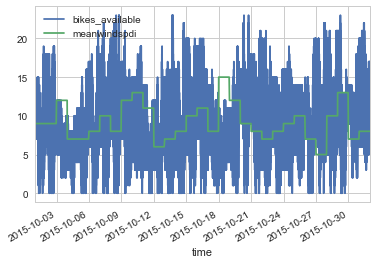

In [60]:
df[['bikes_available', 'meanwindspdi']]['2015-12'].plot()

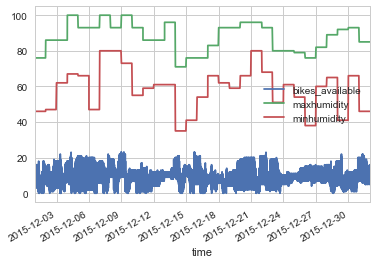

In [62]:
df[['bikes_available', 'maxhumidity', 'minhumidity']]['2015-12'].plot()

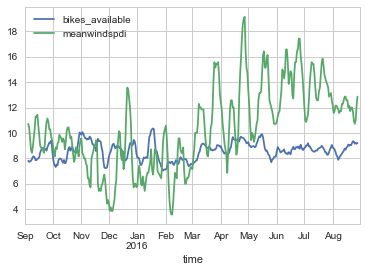

In [76]:
df[['bikes_available', 'meanwindspdi']].resample('D').mean().rolling(window=7, center=True).mean().plot()

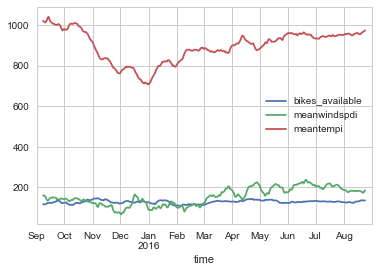

In [73]:
df[['bikes_available', 'meanwindspdi']].resample('D').mean().rolling(window=7, center=True).sum().plot()

In [77]:
!ipython nbconvert San-Francisco-Bike-Share.ipynb --to html

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook San-Francisco-Bike-Share.ipynb to html
[NbConvertApp] Writing 1295208 bytes to San-Francisco-Bike-Share.html
